## Метрики моделей классификации 

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pandas.plotting as pd_plt
import matplotlib.colors as plt_colors
from IPython.display import display
import sklearn
from sklearn.datasets import load_iris
# import warnings
# warnings.filterwarnings('ignore')

print("версия pandas:", pd.__version__)
print("версия sklearn:", sklearn.__version__)

версия pandas: 2.2.2
версия sklearn: 1.5.1


Загрузка датасета

In [16]:
iris_dataset=load_iris()

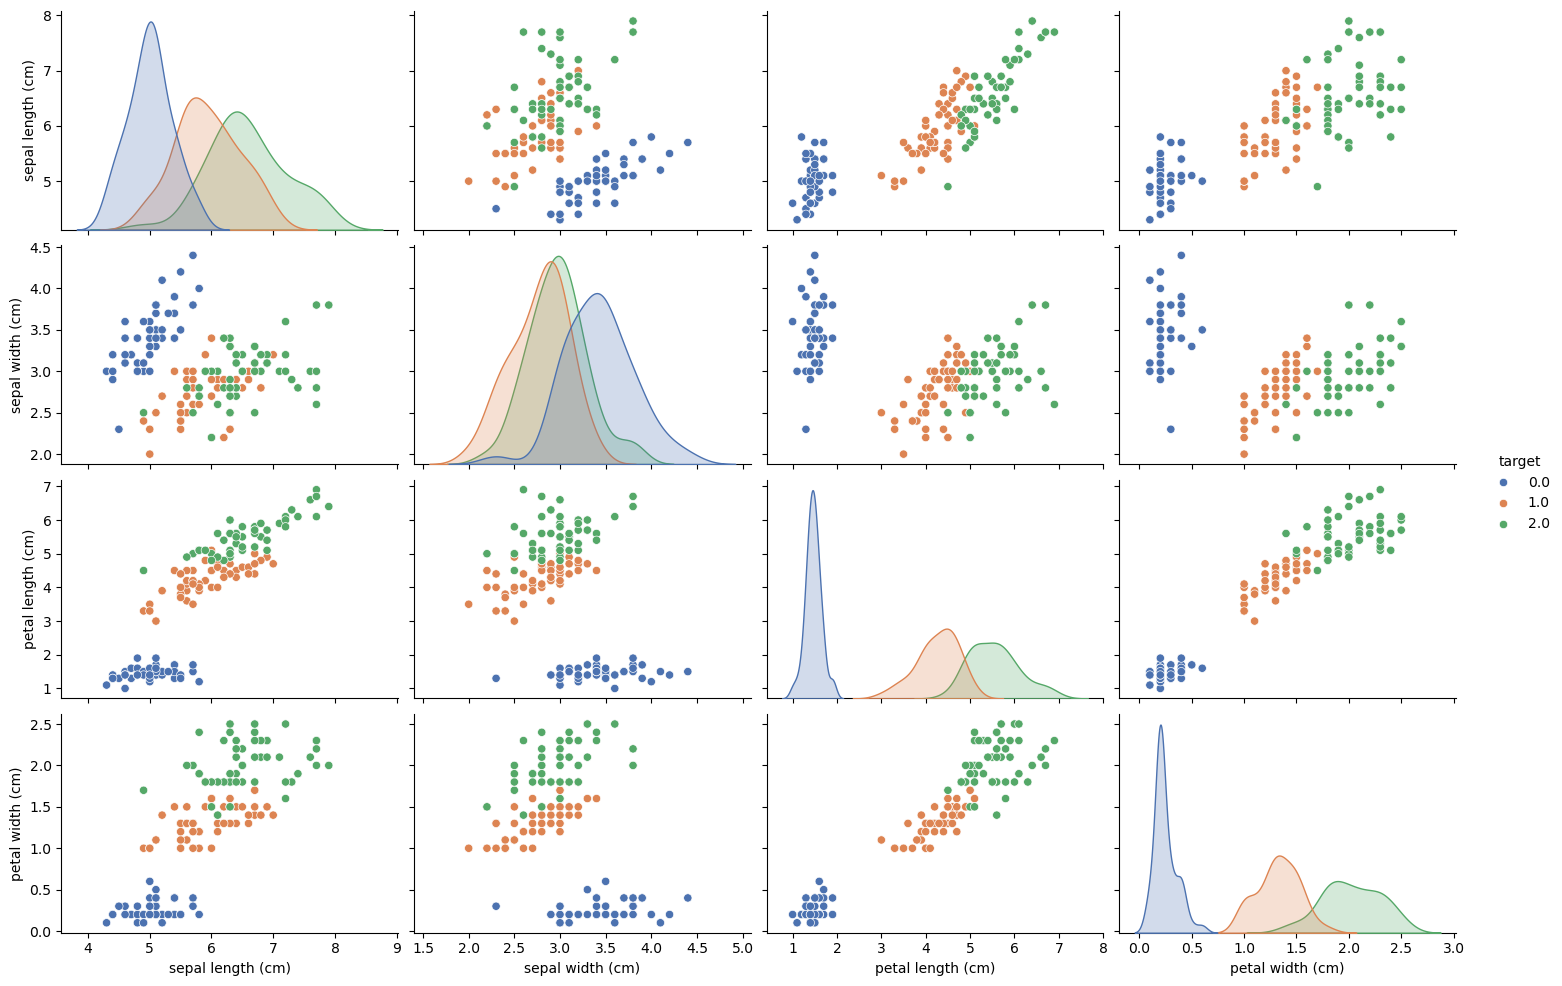

In [18]:
val = np.concatenate((iris_dataset['data'],iris_dataset['target'].reshape(-1,1)), axis=1)
col = iris_dataset['feature_names']+['target']
df = pd.DataFrame(val, columns = col)

sns.pairplot(df, hue='target', palette="deep", aspect=1.5);  

## Делим набор на тренировочный и тестовый
Желательно при классификации использовать стратификацию

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(iris_dataset['data'],iris_dataset['target'],
                                               stratify =iris_dataset['target'], random_state=42)

In [22]:
print('X_train',X_train.shape)
print('y_train',y_train.shape)

X_train (112, 4)
y_train (112,)


In [25]:
print('X_test',X_test.shape)
print('y_test',y_test.shape)

X_test (38, 4)
y_test (38,)


In [27]:
y_train

array([2, 2, 1, 1, 1, 2, 0, 2, 0, 2, 0, 2, 1, 0, 0, 1, 2, 0, 0, 1, 1, 1,
       0, 1, 2, 0, 2, 1, 2, 0, 0, 1, 0, 2, 0, 0, 1, 0, 1, 0, 0, 1, 2, 2,
       0, 2, 1, 0, 2, 0, 2, 2, 0, 1, 2, 2, 1, 1, 0, 1, 1, 2, 1, 2, 0, 1,
       0, 2, 1, 2, 1, 2, 2, 0, 2, 1, 0, 2, 0, 2, 1, 1, 0, 2, 2, 0, 0, 2,
       2, 1, 2, 0, 2, 1, 2, 2, 0, 1, 1, 1, 1, 1, 0, 2, 1, 1, 0, 0, 0, 0,
       1, 0])

In [29]:
y_test

array([0, 1, 1, 1, 0, 1, 2, 2, 2, 2, 2, 2, 1, 1, 0, 0, 0, 1, 0, 1, 2, 1,
       2, 1, 2, 1, 0, 2, 0, 1, 2, 2, 0, 0, 0, 0, 2, 1])

### Обучение с настройками по умолчанию

In [32]:
from sklearn.neighbors import KNeighborsClassifier
X_train,X_test,y_train,y_test=train_test_split(iris_dataset['data'],iris_dataset['target'],
                                               stratify =iris_dataset['target'], random_state=42)
knk = KNeighborsClassifier()
knk.fit(X_train,y_train)

KNeighborsClassifier()

In [34]:
from sklearn.metrics import accuracy_score
y_pred_train = knk.predict(X_train)
y_pred_test = knk.predict(X_test)

print("Значения правильности на тренировочном наборе:", accuracy_score(y_train, y_pred_train))
print("Значения правильности на тестовом наборе:     ",accuracy_score(y_test, y_pred_test))

Значения правильности на тренировочном наборе: 0.9732142857142857
Значения правильности на тестовом наборе:      0.9736842105263158


### Кросс-валидация

Значения правильности перекрестной проверки: [1.   0.95 1.   0.89 0.95 0.95 1.   1.  ]


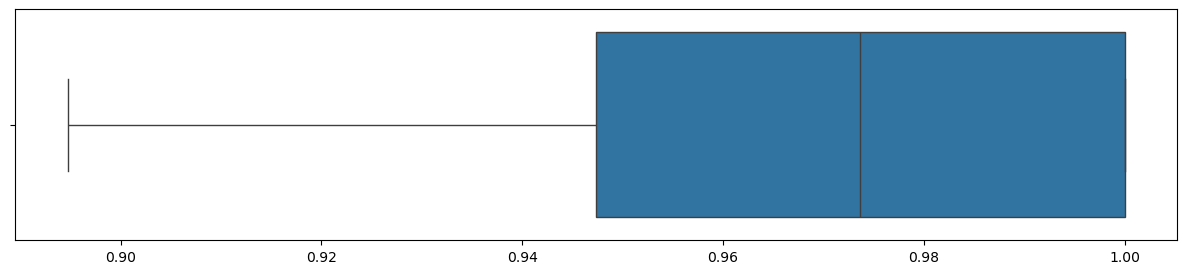

In [37]:
from sklearn.model_selection import cross_val_score 


knk = KNeighborsClassifier()
cross_vall = cross_val_score(knk, iris_dataset.data, iris_dataset.target, cv=8)

np.set_printoptions(precision=2)
print("Значения правильности перекрестной проверки:",cross_vall)

plt.figure(figsize=(15,3))
ax = sns.boxplot(x=cross_vall);

### Пербор параметров алгоритма
Цель найти наилучшею комбинацию

In [40]:
from sklearn.model_selection import GridSearchCV

param_grid = [{
    'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 14, 15, 16, 17, 20],
    'p': [1, 2, 3, 4, 5]
}]

grid = GridSearchCV(knk, param_grid, cv = 8)
grid.fit(X_train, y_train)

GridSearchCV(cv=8, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 14,
                                          15, 16, 17, 20],
                          'p': [1, 2, 3, 4, 5]}])

In [42]:
grid_result = pd.DataFrame(grid.cv_results_).sort_values(["rank_test_score",'std_test_score']).T
grid_result

,61,36,41,60,66,71,31,32,33,34,...,68,76,5,15,6,69,16,17,18,19
mean_fit_time,0.00014,0.000141,0.000141,0.000142,0.000146,0.000141,0.000145,0.000143,0.000144,0.000146,...,0.000143,0.000141,0.000179,0.000146,0.000177,0.000142,0.000142,0.000145,0.000154,0.000145
std_fit_time,0.000001,0.000002,0.000001,0.000004,0.000002,0.000001,0.000007,0.000002,0.000004,0.000004,...,0.000001,0.000001,0.000015,0.000006,0.000012,0.000001,0.000002,0.000004,0.000005,0.000005
mean_score_time,0.000489,0.000486,0.000484,0.000488,0.000517,0.00049,0.000492,0.000521,0.000545,0.000517,...,0.000523,0.000502,0.000598,0.000494,0.000624,0.000526,0.000489,0.000524,0.000554,0.000515
std_score_time,0.000001,0.000004,0.000002,0.000002,0.000027,0.000002,0.000006,0.000006,0.000051,0.000007,...,0.000007,0.000023,0.000024,0.000017,0.000025,0.000018,0.000007,0.000027,0.000018,0.000012
param_n_neighbors,15,8,9,15,16,17,7,7,7,7,...,16,20,2,4,2,16,4,4,4,4
param_p,2,2,2,1,2,2,2,3,4,5,...,4,2,1,1,2,5,2,3,4,5
params,"{'n_neighbors': 15, 'p': 2}","{'n_neighbors': 8, 'p': 2}","{'n_neighbors': 9, 'p': 2}","{'n_neighbors': 15, 'p': 1}","{'n_neighbors': 16, 'p': 2}","{'n_neighbors': 17, 'p': 2}","{'n_neighbors': 7, 'p': 2}","{'n_neighbors': 7, 'p': 3}","{'n_neighbors': 7, 'p': 4}","{'n_neighbors': 7, 'p': 5}",...,"{'n_neighbors': 16, 'p': 4}","{'n_neighbors': 20, 'p': 2}","{'n_neighbors': 2, 'p': 1}","{'n_neighbors': 4, 'p': 1}","{'n_neighbors': 2, 'p': 2}","{'n_neighbors': 16, 'p': 5}","{'n_neighbors': 4, 'p': 2}","{'n_neighbors': 4, 'p': 3}","{'n_neighbors': 4, 'p': 4}","{'n_neighbors': 4, 'p': 5}"
split0_test_score,1.0,0.928571,0.928571,1.0,1.0,1.0,0.928571,0.928571,0.928571,0.928571,...,0.857143,0.857143,0.928571,0.928571,0.857143,0.857143,0.857143,0.857143,0.857143,0.857143
split1_test_score,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
split2_test_score,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.928571,0.928571,0.928571,0.928571,0.928571,0.928571,0.928571,0.928571,0.928571,0.928571


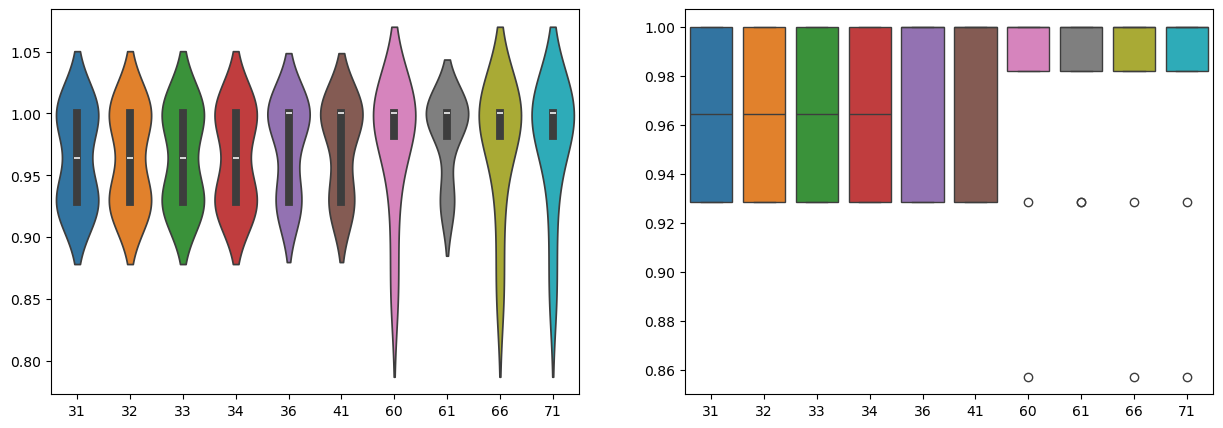

In [74]:
mask = grid_result.index[grid_result.index.str.endswith("_test_score")][:-3]
tabl = grid_result.loc[mask].iloc[:,:10]
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
sns.violinplot(data=tabl, ax=ax1);
sns.boxplot(data=tabl, ax=ax2);

In [42]:
grid.best_estimator_

KNeighborsClassifier(n_neighbors=15)

In [44]:
knk = KNeighborsClassifier(n_neighbors=15)
knk.fit(X_train,y_train)

y_pred_train = knk.predict(X_train)
y_pred_test = knk.predict(X_test)

print("Значения правильности на тренировочном наборе:", accuracy_score(y_train, y_pred_train))
print("Значения правильности на тестовом наборе:     ",accuracy_score(y_test, y_pred_test))

Значения правильности на тренировочном наборе: 0.9821428571428571
Значения правильности на тестовом наборе:      0.9473684210526315
